In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('bank-additional.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [38]:
df.rename(columns={'y':'term_deposit'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [39]:
df.shape

(4119, 21)

In [40]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'term_deposit'],
      dtype='object')

In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
term_deposit      0
dtype: int64

In [43]:
obj_col = df.select_dtypes(include='object').columns
print(obj_col)

num_col = df.select_dtypes(exclude='object').columns
print(num_col)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'term_deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [44]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


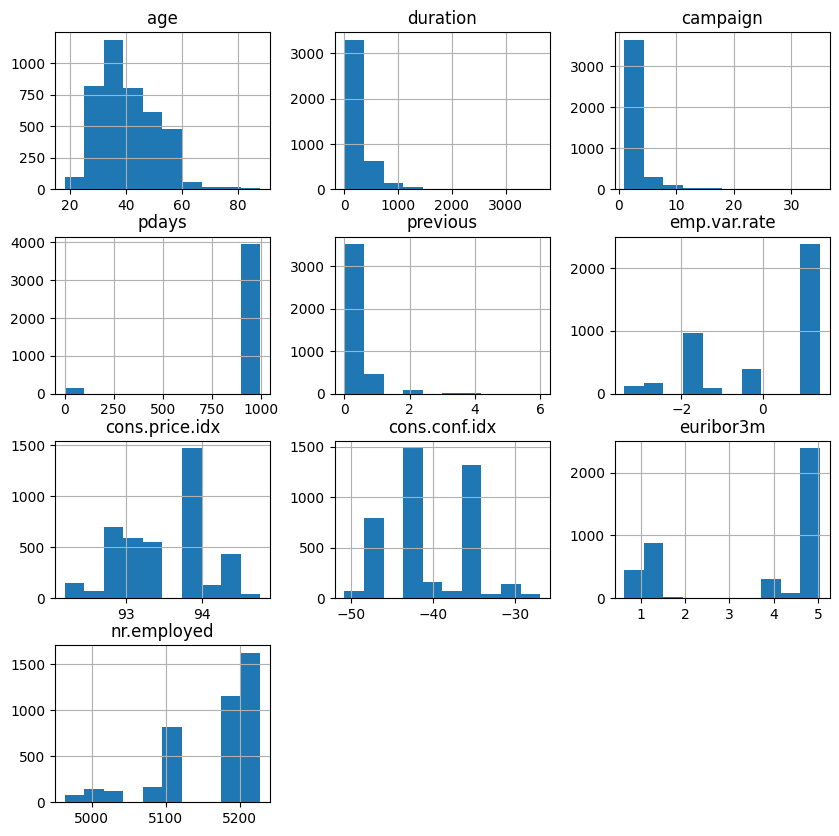

In [45]:
df.hist(figsize=(10,10))
plt.show()

In [46]:
df1 = df.drop(columns=obj_col)

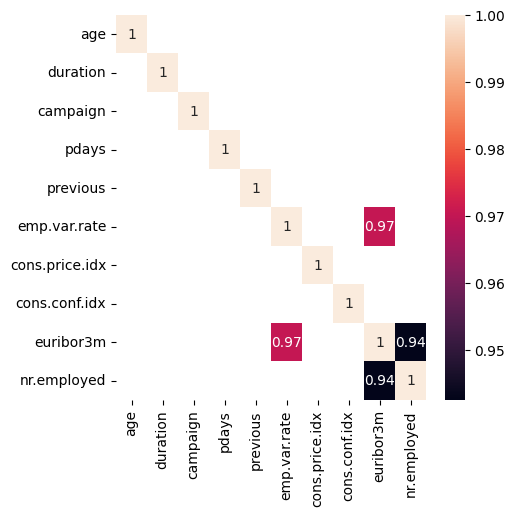

In [47]:
corr = df1.corr()
plt.figure(figsize=(5,5))
corr = corr[abs(corr) >= 0.90]
sns.heatmap(corr,annot=True)
plt.show()

In [48]:
high_corr=['emp.var.rate','euribor3m','nr.employed']

In [49]:
df2 = df.drop(columns=high_corr,axis=1)

In [50]:
df2.shape

(4119, 18)

In [51]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx',
       'term_deposit'],
      dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df2.apply(le.fit_transform)
df_encoded.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,term_deposit
2291,7,8,2,3,0,2,0,0,3,3,109,0,20,1,0,3,20,0
2757,14,0,1,6,0,2,0,0,3,2,141,0,20,0,1,17,6,0
1970,17,0,2,6,0,0,0,0,1,1,87,1,20,0,1,13,17,0
223,21,4,1,1,1,0,0,1,4,1,153,4,20,0,1,23,8,0
2184,23,4,1,6,0,0,0,1,6,0,103,5,20,0,1,18,16,0
1963,18,3,0,0,0,2,0,0,7,3,160,1,20,1,0,11,7,0
1479,20,1,1,3,0,2,0,0,3,4,119,4,20,0,1,17,6,0
3185,40,5,1,0,1,0,0,0,3,3,304,0,20,0,1,17,6,0
1377,2,8,2,7,0,2,2,0,0,3,44,1,20,0,1,10,3,0
3917,19,7,1,3,0,2,0,0,4,4,197,0,20,0,1,9,9,0


In [54]:
df['term_deposit'].value_counts(normalize=True)*100

term_deposit
no     89.05074
yes    10.94926
Name: proportion, dtype: float64

In [55]:
X = df_encoded.drop(columns='term_deposit')
y = df_encoded['term_deposit']  

In [56]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3295, 17)
(824, 17)
(3295,)
(824,)


In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [67]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [70]:
print("Training accuracy:",dt.score(x_train,y_train))
print("Testing accuracy:",dt.score(x_test,y_test))

Training accuracy: 0.9423368740515933
Testing accuracy: 0.9138349514563107


In [61]:
y_pred = dt.predict(x_test)

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       747
           1       0.53      0.36      0.43        77

    accuracy                           0.91       824
   macro avg       0.73      0.67      0.69       824
weighted avg       0.90      0.91      0.90       824



In [63]:
from sklearn.tree import plot_tree

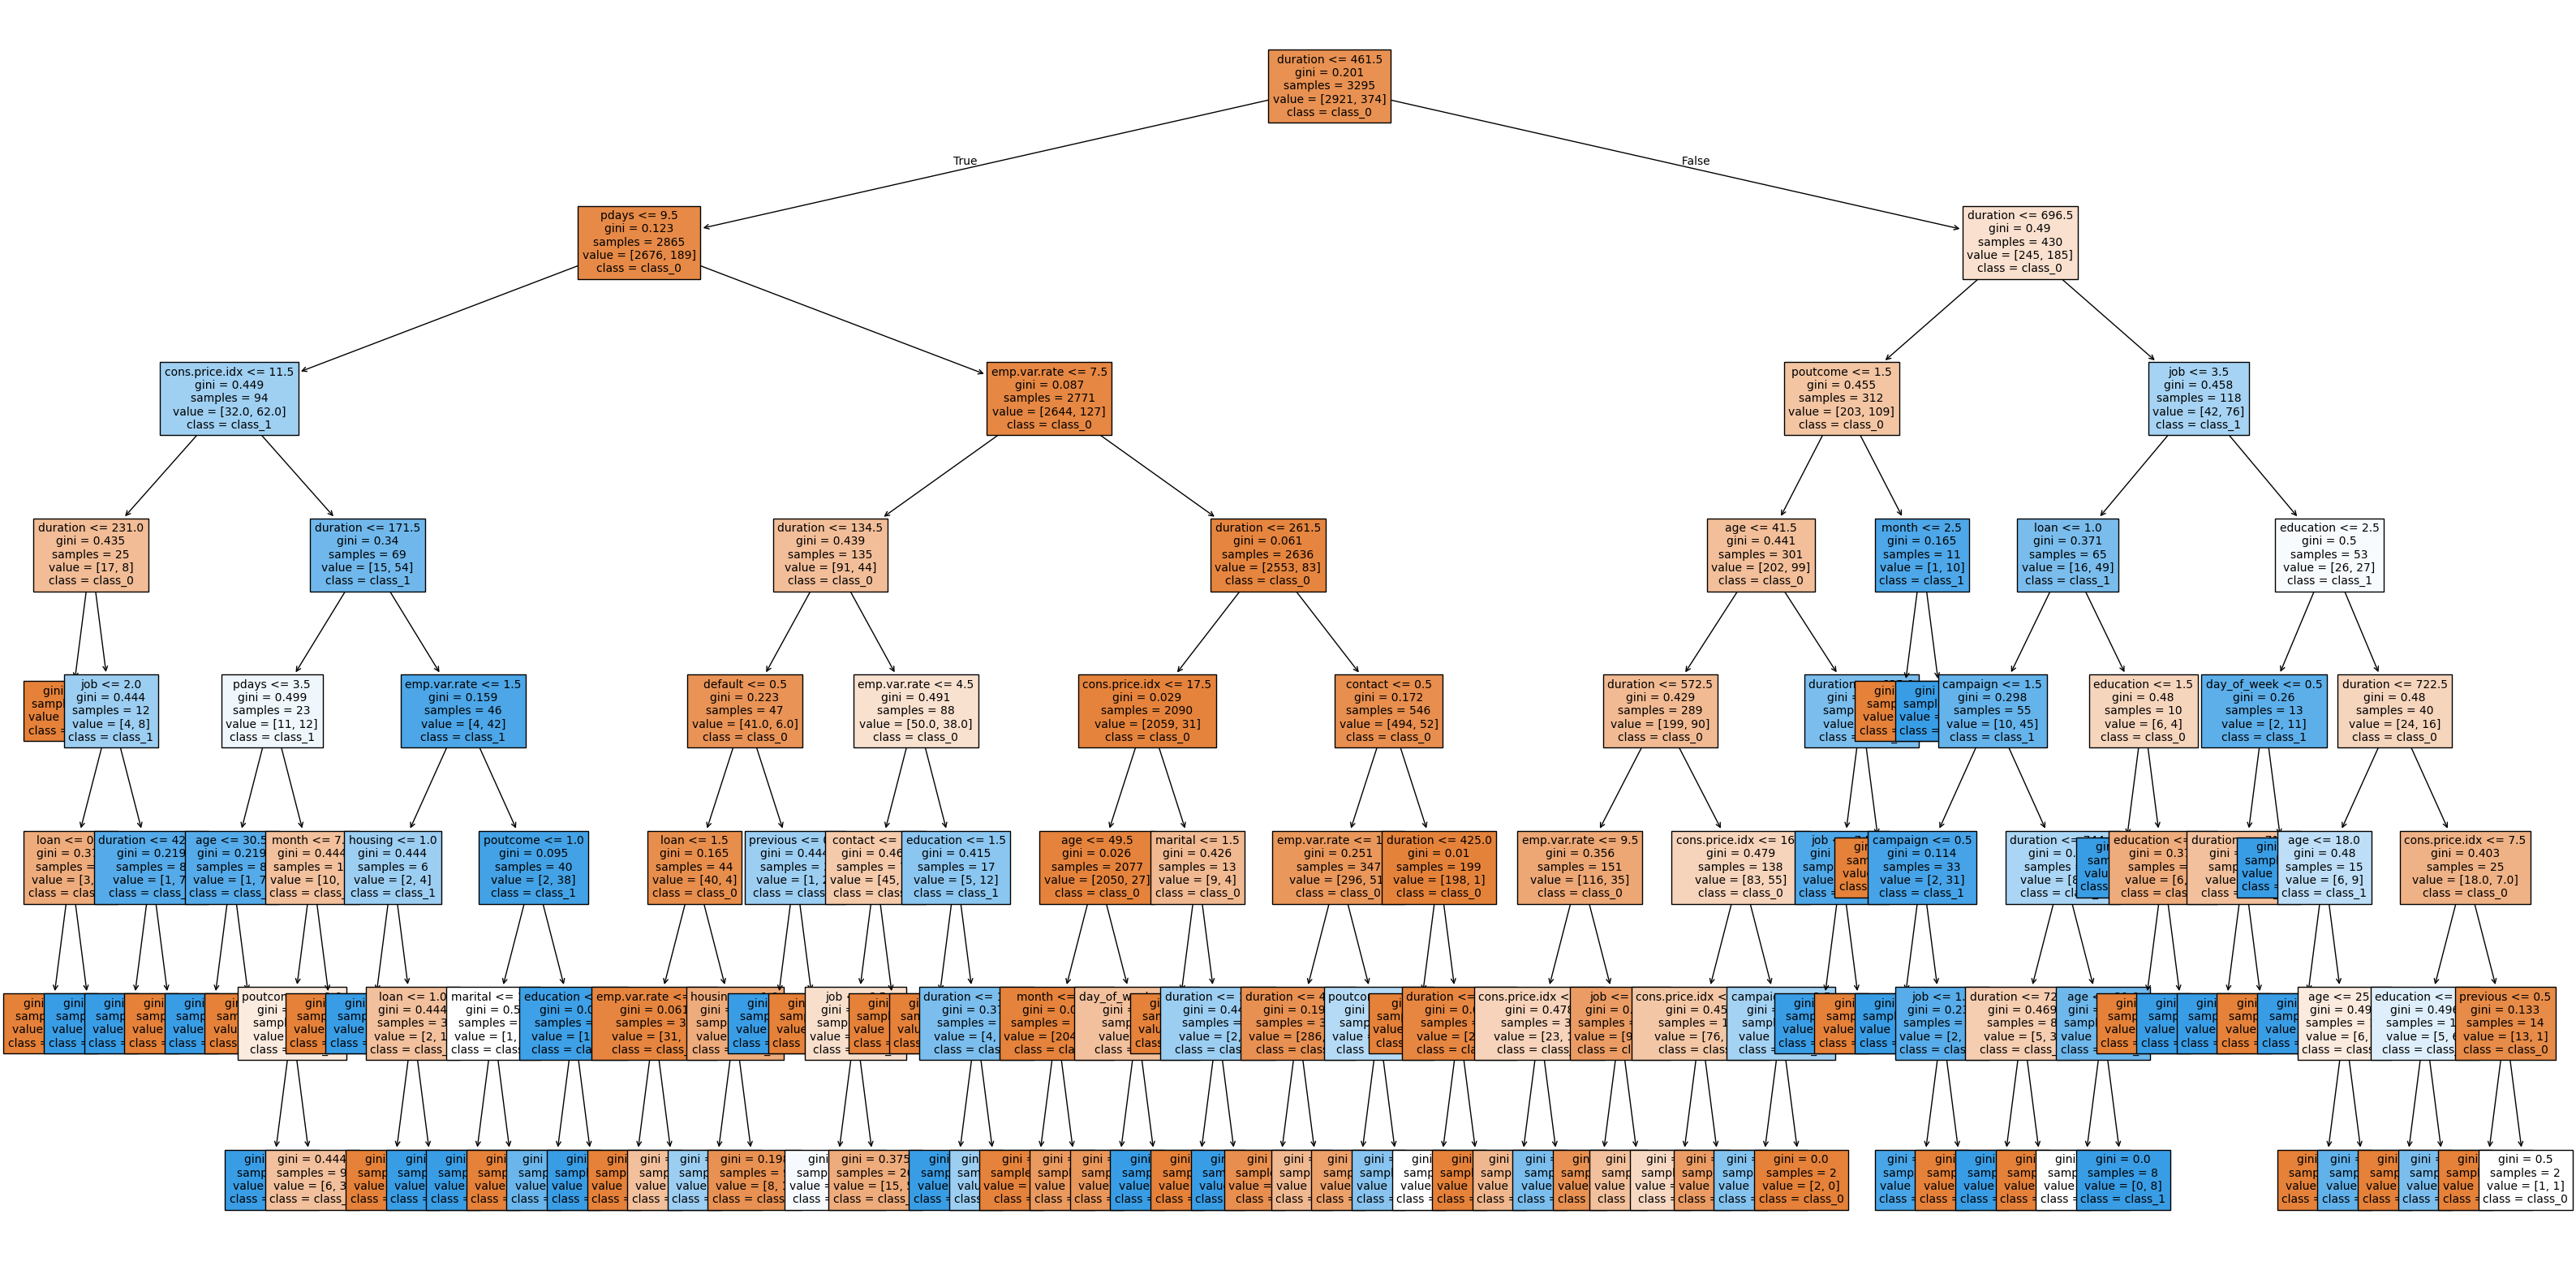

In [71]:
feature_names=df.columns.tolist()
plt.figure(figsize=(40,20))
class_names=["class_0","class_1"]
plot_tree(dt, feature_names=feature_names, class_names=class_names, filled=True,fontsize=10)
plt.show()